In [1]:
#import library
#get warnings unnecessary item not show
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import dataset
df = pd.read_csv("insurance.csv")

In [3]:
# 1st 5row show in dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# dataset size
df.shape

(1338, 7)

In [5]:
# dataset all information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


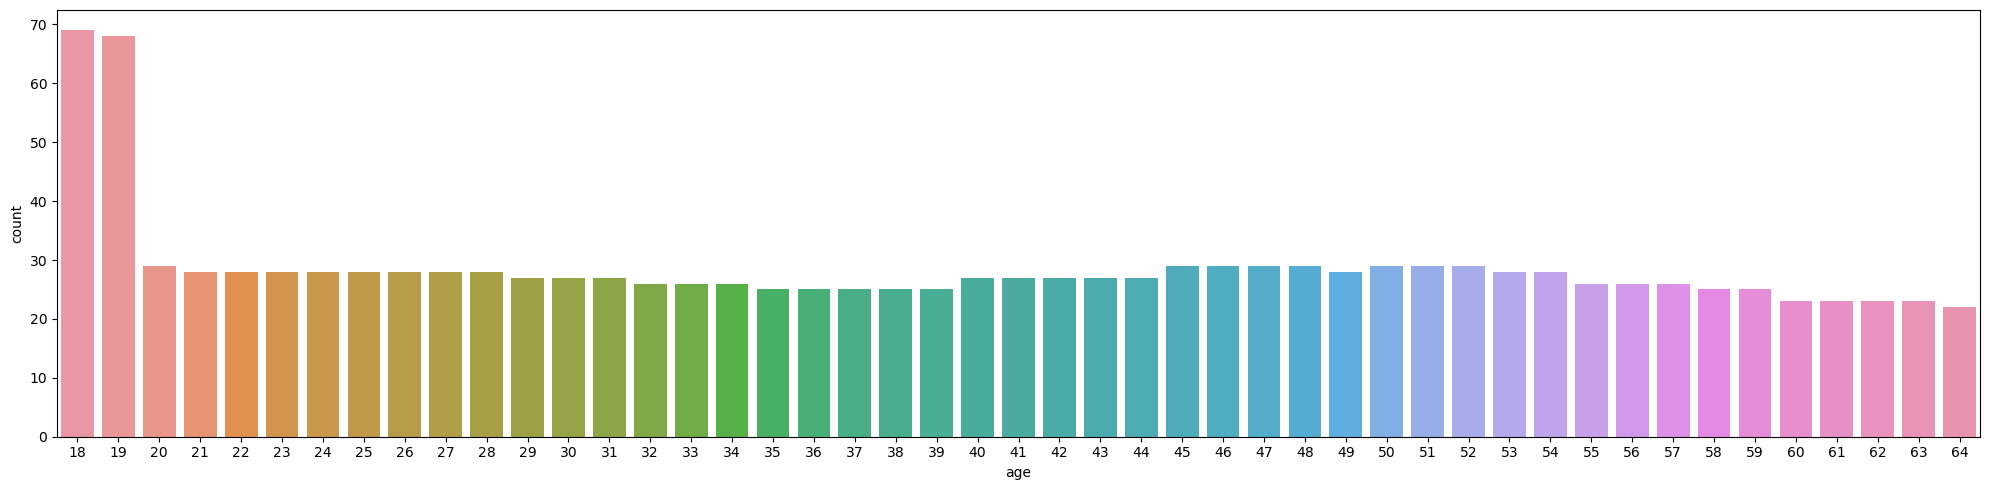

In [6]:
# create a figure with size 20x5 inches 
plt.figure(figsize=(20,5))
#age bar chart
sns.countplot(df["age"])
plt.tight_layout()
plt.show()

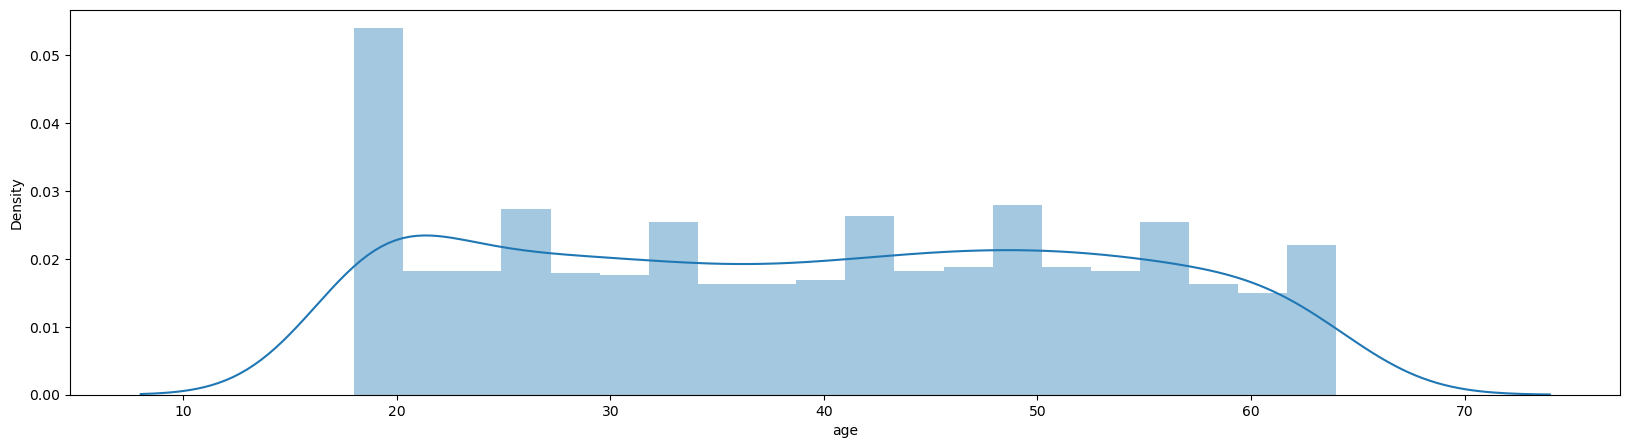

In [7]:
# create a figure with size 20x5 inches 
plt.figure(figsize=(20,5))
#age bar chart
sns.distplot(df["age"],bins=20)
plt.show()

In [8]:
# sex column value counts
df.value_counts("sex")

sex
male      676
female    662
dtype: int64

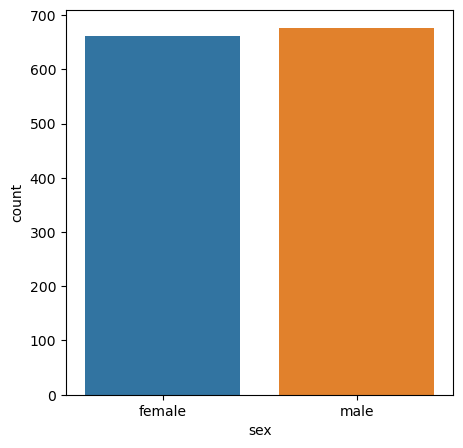

In [9]:
# create a figure with size 5x5 inches 
plt.figure(figsize=(5,5))
#sex bar chart
sns.countplot("sex",data=df)
plt.show()

In [10]:
# children column value counts
df.value_counts("children")

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

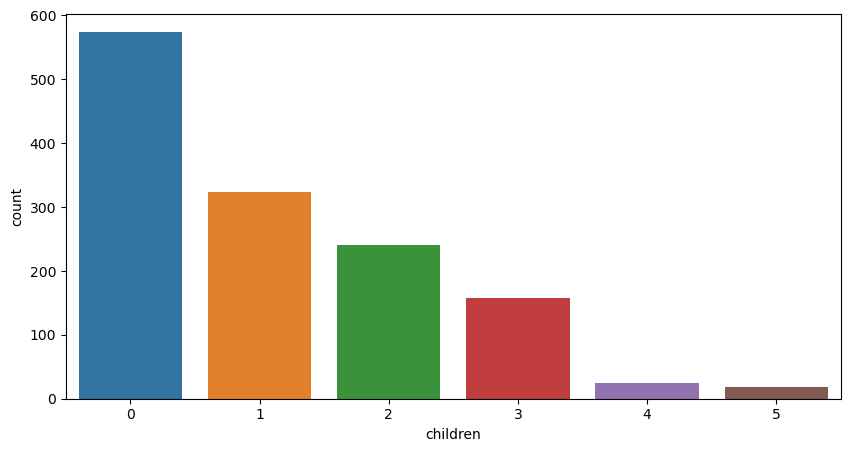

In [11]:
# create a figure with size 10x5 inches 
plt.figure(figsize=(10, 5))
#children bar chart
sns.countplot("children", data=df)
plt.show()

In [12]:
# smoker column value counts
df.value_counts("smoker")

smoker
no     1064
yes     274
dtype: int64

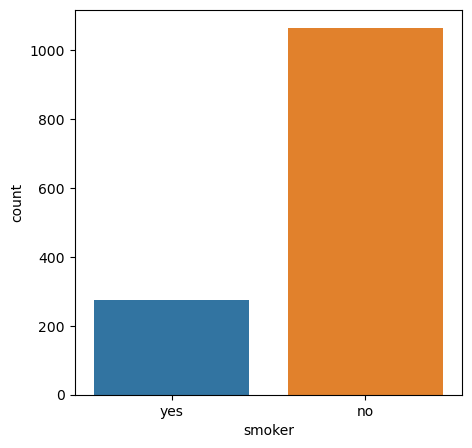

In [13]:
# create a figure with size 10x5 inches 
plt.figure(figsize=(5, 5))
#smoker bar chart
sns.countplot("smoker", data=df)
plt.show()

In [14]:
# region column value counts
df.value_counts("region")

region
southeast    364
northwest    325
southwest    325
northeast    324
dtype: int64

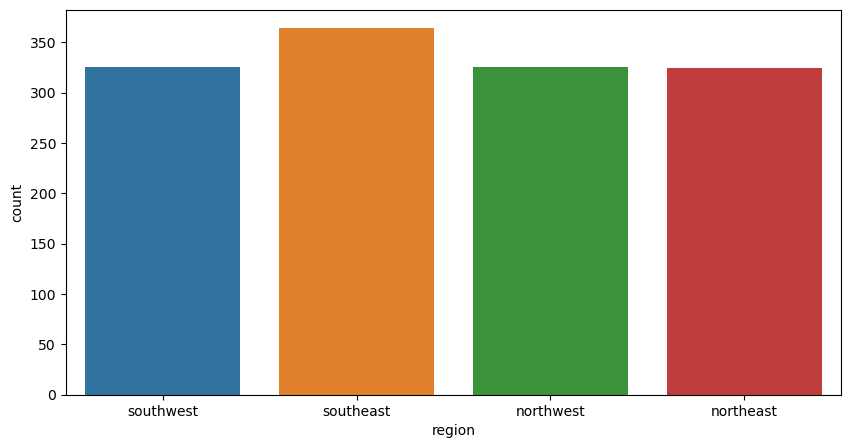

In [15]:
# create a figure with size 10x5 inches
plt.figure(figsize=(10,5))
#region bar chart
sns.countplot(df["region"])
plt.show()

# Encoding Data Model

In [16]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [17]:
# createing LabelEncoder object
le = LabelEncoder()

In [18]:
# import is_numeric_dtype
from pandas.core.dtypes.common import is_numeric_dtype

In [19]:
# all column encoding
for column in df:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column] = le.fit_transform(df[[column]])

In [20]:
# 1st 5row show in dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


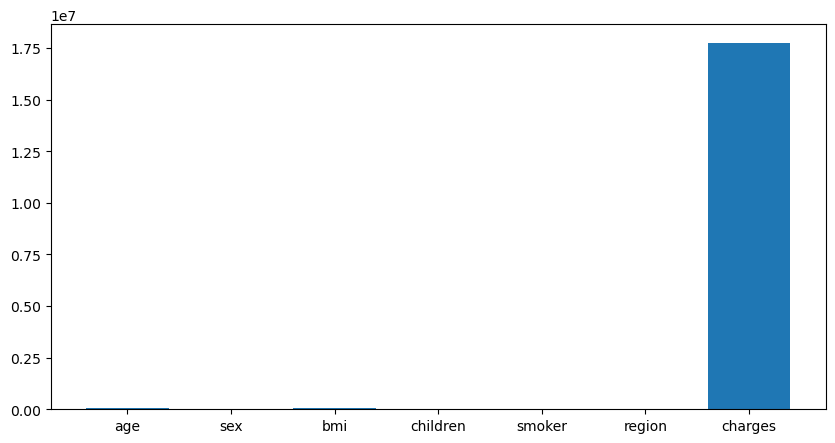

In [21]:
# create a figure with size 10x5 inches
plt.figure(figsize=(10,5))
# dataset bar chart
plt.bar(df.columns,height=df.sum())
plt.show()

In [22]:
# all data describing
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


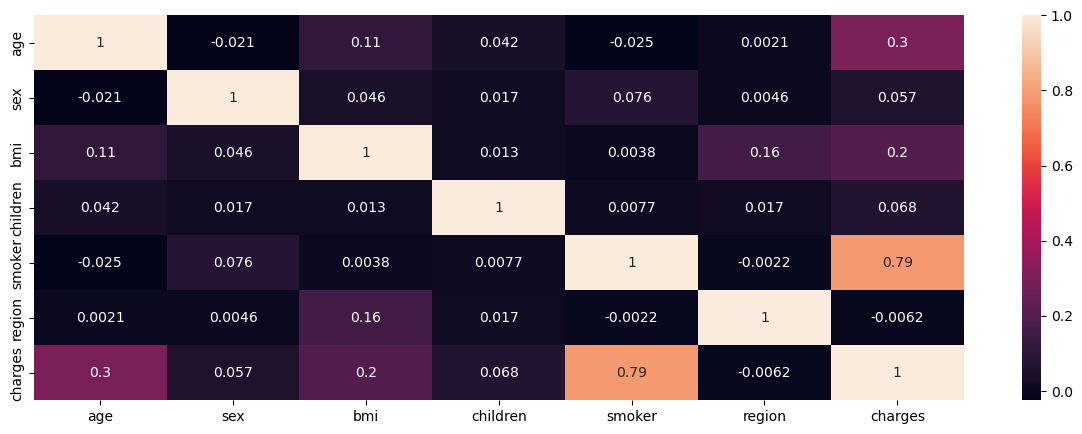

In [23]:
# create a figure with size 15x5 inches
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [24]:
# fichar selection in x
x = df.drop(["charges"],axis=1)

In [25]:
# class selection in y
y = df[["charges"]]

In [26]:
# 1st 5row show in x
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [27]:
# 1st 5row show in y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


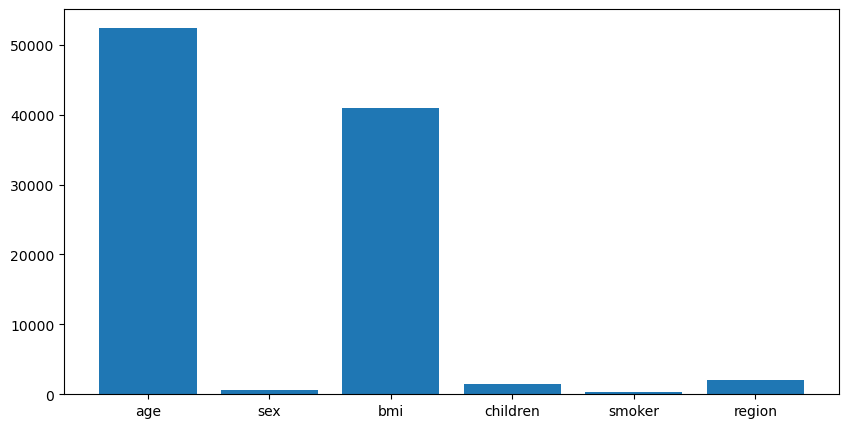

In [28]:
# create a figure with size 10x5 inches
plt.figure(figsize=(10,5))
# fichar bar chart
plt.bar(x.columns,height=x.sum())
plt.show()

# Feature Importances

In [29]:
#import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [30]:
#createing object in ExtraTreesRegressor
ext = ExtraTreesRegressor()

In [31]:
# train the data model
ext.fit(x,y)

ExtraTreesRegressor()

In [32]:
#x fichar  importances columns
ext.feature_importances_

array([0.12909318, 0.0097222 , 0.19447478, 0.02420246, 0.62059197,
       0.02191541])

In [33]:
# dataset in x fichar  importances columns
top = pd.Series(ext.feature_importances_,index=x.columns)

In [34]:
#print x fichar  importances columns
top

age         0.129093
sex         0.009722
bmi         0.194475
children    0.024202
smoker      0.620592
region      0.021915
dtype: float64

In [35]:
#x fichar  importances columns size
top.shape

(6,)

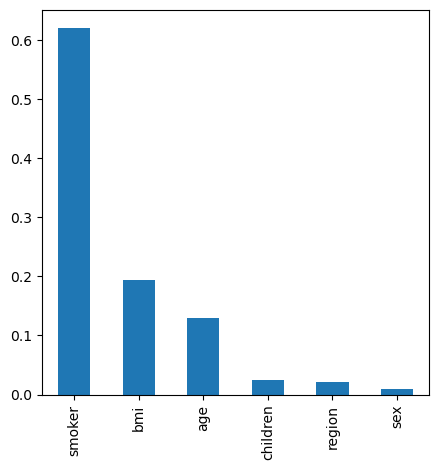

In [36]:
# create a figure with size 5x5 inches 
plt.figure(figsize=(5,5))
# x fichar  importances columns bar chart
top.nlargest(6).plot(kind = "bar")
plt.show()

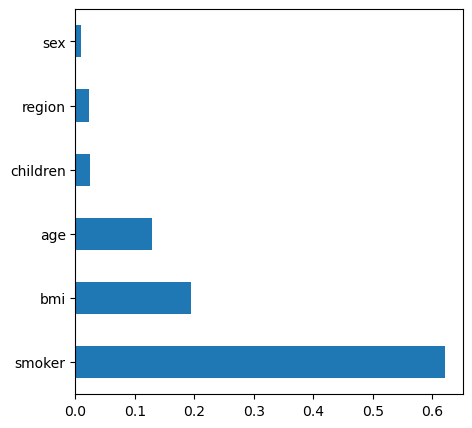

In [37]:
# create a figure with size 5x5 inches 
plt.figure(figsize=(5,5))
# x fichar  importances columns bar chart
top.nlargest(6).plot(kind = "barh")
plt.show()

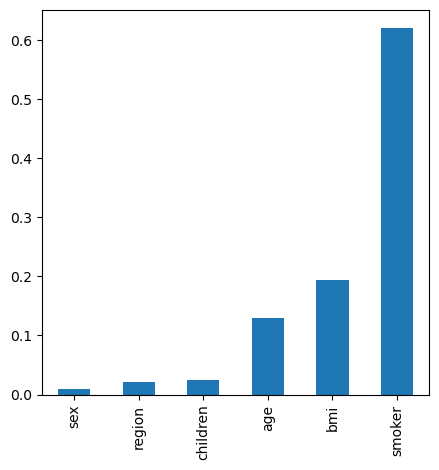

In [38]:
# create a figure with size 5x5 inches 
plt.figure(figsize=(5,5))
# x fichar  importances columns bar chart
top.nsmallest(6).plot(kind = "bar")
plt.show()

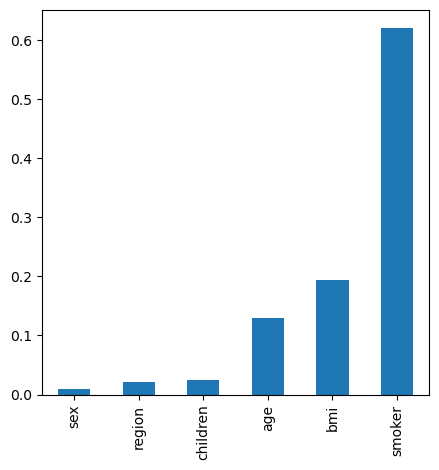

In [39]:
# create a figure with size 5x5 inches 
plt.figure(figsize=(5,5))
# x fichar  importances columns bar chart
top.nsmallest(6).plot(kind = "bar")
plt.show()

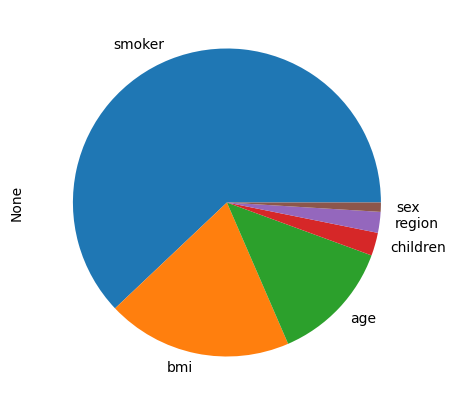

In [40]:
# create a figure with size 5x5 inches 
plt.figure(figsize=(5,5))
# x fichar  importances columns pie chart
top.nlargest(6).plot(kind = "pie")
plt.show()

# Training & Testing Data

In [41]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [42]:
# 70% data tarining & 30% data testing 
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [43]:
# 1st 5row show in xtrain
xtrain.head()

,age,sex,bmi,children,smoker,region
332,61,0,31.160,0,0,1
355,46,1,27.600,0,0,3
138,54,0,31.900,3,0,2
381,55,1,30.685,0,1,0
292,25,1,45.540,2,1,2


In [44]:
# 1st 5row show in ytrain
ytrain.head()

,charges
332,13429.03540
355,24603.04837
138,27322.73386
381,42303.69215
292,42112.23560


In [45]:
# xtrain size
xtrain.shape

(936, 6)

In [46]:
# ytrain size
ytrain.shape

(936, 1)

# LinearRegression

In [47]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

In [48]:
# createing LinearRegression object
lr = LinearRegression()

In [49]:
# tarining the model
lr.fit(xtrain,ytrain)

LinearRegression()

In [50]:
# all model predict
lr.predict(xtest)

array([[ 8.93142116e+03],
       [ 7.07090670e+03],
       [ 3.69370805e+04],
       [ 9.59699214e+03],
       [ 2.70083549e+04],
       [ 1.08664849e+04],
       [ 3.74610217e+01],
       [ 1.72228092e+04],
       [ 9.18308115e+02],
       [ 1.13965537e+04],
       [ 2.79154456e+04],
       [ 9.53381323e+03],
       [ 5.18928014e+03],
       [ 3.86124990e+04],
       [ 4.05094490e+04],
       [ 3.72748566e+04],
       [ 1.53562559e+04],
       [ 3.59449407e+04],
       [ 9.10631783e+03],
       [ 3.14429410e+04],
       [ 3.66298253e+03],
       [ 1.00966745e+04],
       [ 2.21091896e+03],
       [ 7.10598084e+03],
       [ 1.13521417e+04],
       [ 1.30231210e+04],
       [ 1.44472857e+04],
       [ 6.12031303e+03],
       [ 9.94564893e+03],
       [ 2.18617424e+03],
       [ 8.91389260e+03],
       [ 1.31869496e+04],
       [ 4.49110116e+03],
       [ 3.30469662e+03],
       [ 4.32885102e+03],
       [ 1.32330189e+04],
       [ 1.67071398e+03],
       [ 8.63238607e+03],
       [ 3.3

# Accuracy Score & MSE & MAE & R2 Score

In [51]:
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score

In [52]:
lr.score(xtrain,ytrain)

0.74225713201721

In [53]:
lr.score(xtest,ytest)

0.7694415927057693

In [54]:
r2_score(ytest,lr.predict(xtest))

0.7694415927057693

In [55]:
mean_squared_error(ytest,lr.predict(xtest))

33805466.898688614

In [56]:
mean_absolute_error(ytest,lr.predict(xtest))

4155.2398430593785

# DecisionTreeRegressor

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtr = DecisionTreeRegressor()

In [59]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [60]:
dtr.predict(xtest)

array([ 8604.48365,  5469.0066 , 28950.4692 ,  9500.57305, 33732.6867 ,
       11326.71487,  2128.43105, 14410.9321 ,  3353.4703 ,  9620.3307 ,
       19361.9988 ,  6600.361  ,  3766.8838 , 46200.9851 , 48173.361  ,
       48885.13561, 10806.839  , 41676.0811 ,  8515.7587 , 21348.706  ,
        4234.927  ,  7727.2532 ,  1253.936  ,  2741.948  , 10600.5483 ,
       10338.9316 , 12648.7034 ,  4877.98105, 10493.9458 ,  1135.9407 ,
        7682.67   , 11840.77505,  2020.177  ,  4906.40965,  2902.9065 ,
       12797.20962,  2331.519  ,  6849.026  , 22218.1149 , 37742.5757 ,
       18838.70366,  2639.0429 , 10713.644  , 12142.5786 ,  5584.3057 ,
       12913.9924 ,  4830.63   ,  4234.927  , 40273.6455 ,  4673.3922 ,
       13887.9685 ,  1711.0268 ,  6393.60345,  1708.0014 , 11394.06555,
       10600.5483 ,  3736.4647 , 37742.5757 , 11362.755  , 29186.48236,
       13393.756  ,  4058.1161 , 15555.18875,  7640.3092 ,  9722.7695 ,
       12609.88702, 16232.847  , 19749.38338,  3561.8889 ,  1526

In [61]:
dtr.score(xtrain,ytrain)

1.0

In [62]:
dtr.score(xtest,ytest)

0.7406719808762702

In [63]:
r2_score(ytest,dtr.predict(xtest))

0.7406719808762702

In [64]:
mean_squared_error(ytest,dtr.predict(xtest))

38023791.32157158

In [65]:
mean_absolute_error(ytest,dtr.predict(xtest))

2829.2014409427866

# RandomForestRegressor

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
rfr = RandomForestRegressor()

In [68]:
rfr.fit(xtest,ytest)

RandomForestRegressor()

In [69]:
rfr.score(xtrain,ytrain)

0.819791015058575

In [70]:
rfr.score(xtest,ytest)

0.9770802201938344

In [71]:
r2_score(ytest,rfr.predict(xtest))

0.9770802201938344

In [72]:
mean_squared_error(ytest,rfr.predict(xtest))

3360596.851164788

In [73]:
mean_absolute_error(ytest,rfr.predict(xtest))

949.0269913771384

# SVM

In [74]:
from sklearn.svm import SVR

In [75]:
svr = SVR()

In [76]:
svr.fit(xtrain,ytrain)

SVR()

In [77]:
svr.predict(xtest)

array([9505.68232484, 9456.19391386, 9594.9877607 , 9511.71146332,
       9391.70314732, 9454.93396699, 9391.71226498, 9597.43388873,
       9419.88958454, 9530.46553255, 9425.57511185, 9484.8984049 ,
       9421.61147905, 9518.53476642, 9583.90420595, 9523.33410581,
       9534.38207192, 9522.69755376, 9512.94714873, 9495.02746117,
       9407.04709199, 9497.55097937, 9390.90466288, 9405.5308431 ,
       9535.6923874 , 9558.8818383 , 9585.12796866, 9414.05683008,
       9517.98959382, 9388.98286181, 9478.50843598, 9572.57209779,
       9397.71306972, 9426.2895132 , 9409.98529617, 9512.26927413,
       9394.58682349, 9496.2255405 , 9543.844616  , 9459.20227955,
       9391.45445758, 9397.97736135, 9568.87008455, 9576.92048217,
       9443.80732625, 9578.43398392, 9396.8440045 , 9406.3330321 ,
       9499.40319218, 9436.44648306, 9595.05288204, 9388.74729279,
       9485.04667169, 9388.88755843, 9568.77225912, 9537.76593922,
       9425.30219689, 9433.56203572, 9577.04729409, 9554.07114

In [78]:
svr.score(xtrain,ytrain)

-0.10045084637226287

In [79]:
svr.score(xtest,ytest)

-0.08171487174467051

In [80]:
r2_score(ytest,svr.predict(xtest))

-0.08171487174467051

In [81]:
mean_squared_error(ytest,svr.predict(xtest))

158605694.4083457

In [82]:
mean_absolute_error(ytest,svr.predict(xtest))

8230.1079520437

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

In [84]:
gbr = GradientBoostingRegressor()

In [85]:
gbr.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [86]:
gbr.predict(xtest)

array([10613.51249559,  5680.4342457 , 29627.69439108,  9541.85252649,
       34327.94325127,  4962.3508465 ,  2299.40102111, 16070.7350595 ,
        4330.24331921, 11071.50277052, 18631.98027446,  7567.38807257,
        4459.23189637, 45865.55619837, 47105.23965952, 45377.43181479,
       11766.50422421, 45490.8041926 ,  9099.86497246, 24190.51024892,
        6070.53804118,  8877.08734464,  1846.27745351,  4342.89005009,
       11844.87104146, 12415.40689777, 14418.19983619,  6966.38395145,
       11873.80325058,  3346.84494876,  7496.7973755 , 12022.39885384,
        3104.19747569,  6225.84174375,  4928.57061977, 10177.92920393,
        4115.75230999,  8484.595674  , 26761.11967517, 40717.20546526,
        6012.25878027,  4534.36929011, 13593.28619931, 14312.66384893,
        6686.55100825, 16068.3231131 ,  6096.62386646,  6450.78526151,
       42989.71303551,  5823.70542022, 14322.21177735,  2251.81397234,
        6962.98686947,  2507.35708549, 12202.58694563, 12005.01414558,
      

In [87]:
gbr.score(xtrain,ytrain)

0.9053000443223976

In [88]:
gbr.score(xtest,ytest)

0.8691882581155086

In [89]:
r2_score(ytest,gbr.predict(xtest))

0.8691882581155086

In [90]:
mean_squared_error(ytest,lr.predict(xtest))

33805466.898688614

In [91]:
mean_absolute_error(ytest,lr.predict(xtest))

4155.2398430593785

# Best Model Identifying¶

In [92]:
l = r2_score(ytest,lr.predict(xtest))
t = r2_score(ytest,dtr.predict(xtest))
r = r2_score(ytest,rfr.predict(xtest))
s = r2_score(ytest,svr.predict(xtest))
G = r2_score(ytest,svr.predict(xtest))

In [93]:
final_data = pd.DataFrame({"Models":["LR","DT","RF","SVM","GB"],"R2_Score":[l,t,r,s,G]})

In [94]:
final_data

,Models,R2_Score
0,LR,0.769442
1,DT,0.740672
2,RF,0.977080
3,SVM,-0.081715
4,GB,-0.081715


<AxesSubplot:xlabel='Models', ylabel='R2_Score'>

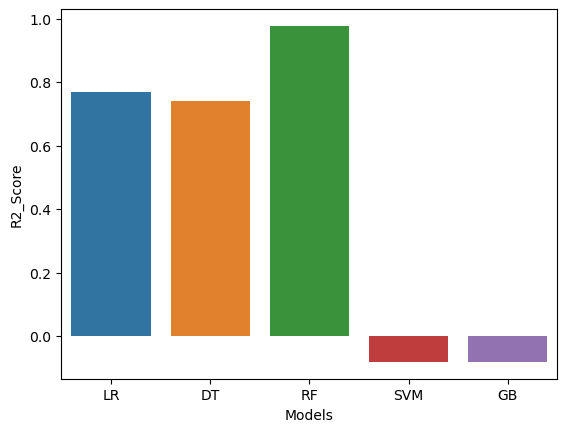

In [95]:
sns.barplot(final_data["Models"],final_data["R2_Score"])

# Download Machine Learning Model

In [96]:
import pickle as pk

In [97]:
pk.dump(rfr,open("Bank Insurance.Machine Learning Model","wb"))